### Setting

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os.path import join, dirname
from glob import glob

In [2]:
git_dir = '../../..'
root_dir = git_dir + '/machine_learning/PCA'
data_dir = root_dir + '/eigenface/Original'

In [3]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [4]:
def draw_faces(data, title):
    fig = plt.figure(figsize=(10,3))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    nn = data.shape[0]
    row, col = [2, int(nn*.5)] if nn%2==0 else [1, nn]
    for i in range(row):
        for j in range(col):
            k = i * col + j
            ax = fig.add_subplot(row, col, k+1)
            ax.imshow(data[k], cmap=plt.cm.bone)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

### load data

In [5]:
## load data
data_list = sorted(glob(join(data_dir,'*.png')))
faces = np.array([rgb2gray(mpimg.imread(datum)) for datum in data_list])
print(faces.shape)

(20, 45, 40)


In [6]:
## a volume of
v_data = np.array(faces.shape)
v_samples = np.array(faces.shape[0])
v_features = np.array(faces.shape[1:])

In [7]:
## a number of 
n_samples = v_samples.prod()
n_features = v_features.prod()

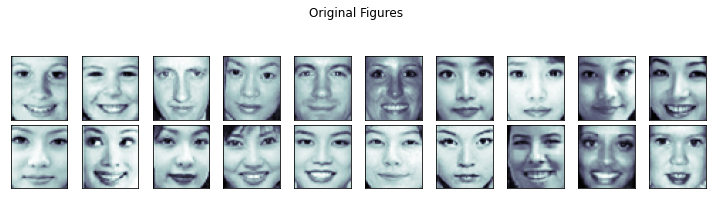

In [8]:
## show original pictures
draw_faces(faces, "Original Figures")

### reshape data

In [9]:
## reshape data : (n,x,y) -> (n,s). It means that each picture is a vector.
temp = faces.reshape(n_samples,n_features)
temp = np.array(temp)
faces = temp
faces.shape # n_samples * n_features

(20, 1800)

### obtain eigenvectors in order of large variance

In [10]:
## principal component analysis with n_components ( < min(n_features,n_samples) ) 
np = 5
pca = PCA(n_components=np)

In [11]:
## fit the model with X and apply the dimensionality reduction on X
X = pca.fit_transform(faces)
X.shape

(20, 5)

In [12]:
## compute data covariance with the generative model
mat_cov = pca.get_covariance()
mat_cov.shape

(1800, 1800)

In [13]:
## transform data back to its original space (approximation)
faces_tilde = pca.inverse_transform(X)
faces_tilde.shape

(20, 1800)

### eigenfaces

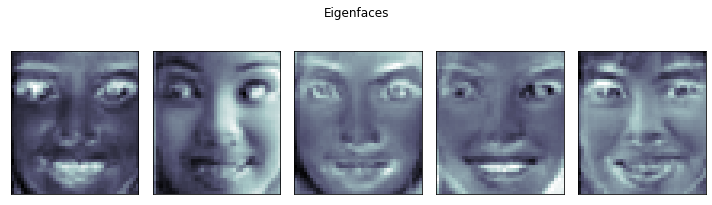

In [14]:
ef = pca.components_.reshape(np,*v_features)
draw_faces(ef, "Eigenfaces")

In [15]:
## principal component analysis with n_components ( < min(n_features,n_samples) ) 
pca = PCA(n_components=5)
print(pca)
X = pca.fit_transform(faces) # X is projection on eigenvectors
print(X.shape)
mat_cov = pca.get_covariance()
print(mat_cov.shape)

PCA(n_components=5)
(20, 5)
(1800, 1800)


### show result

In [16]:
## return the data to its original dimension
temp = faces_tilde.reshape(*v_data)
faces_tilde = temp
faces_tilde.shape

(20, 45, 40)

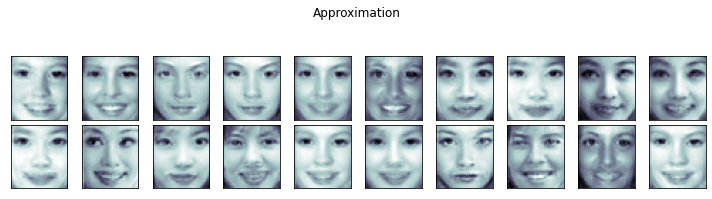

In [17]:
## show result
draw_faces(faces_tilde, "Approximation")